### 1

In [1]:
from hicrep.utils import readMcool
from hicrep import hicrepSCC
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from scipy import cluster
from Bio import SeqIO
import requests
from time import sleep
from tqdm.notebook import tqdm
import re
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
files = [
    'Kc167_rep1.dm3.mapq_30.1000.mcool',
    'Kc167_rep2.dm3.mapq_30.1000.mcool', 
    'lib1.dm3.mapq_30.1000.mcool',
    'lib2.dm3.mapq_30.1000.mcool'
]

In [3]:
def chr_median(scc_result):
    target_chr = [1, 3, 5, 7, 9, 12]
    return sum(scc_result[i - 1] for i in target_chr) / len(target_chr)

In [6]:
scc_heatmap = np.zeros((4, 4))
bin_size = 10000
dbpmax = 5000000
for i in range(len(files)):
    for j in range(i + 1, len(files)):
        scc_heatmap[i, j] = chr_median(hicrepSCC(
            readMcool(files[i], bin_size)[0],
            readMcool(files[j], bin_size)[0], 
            1, 
            dbpmax,
            bDownSample=False
        ))
        scc_heatmap[j, i] = scc_heatmap[i, j]

/usr/local/lib/python3.8/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.8/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.8/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.8/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.8/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.8/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan

/usr/local/lib/python3.8/site-packages/seaborn/matrix.py:629: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


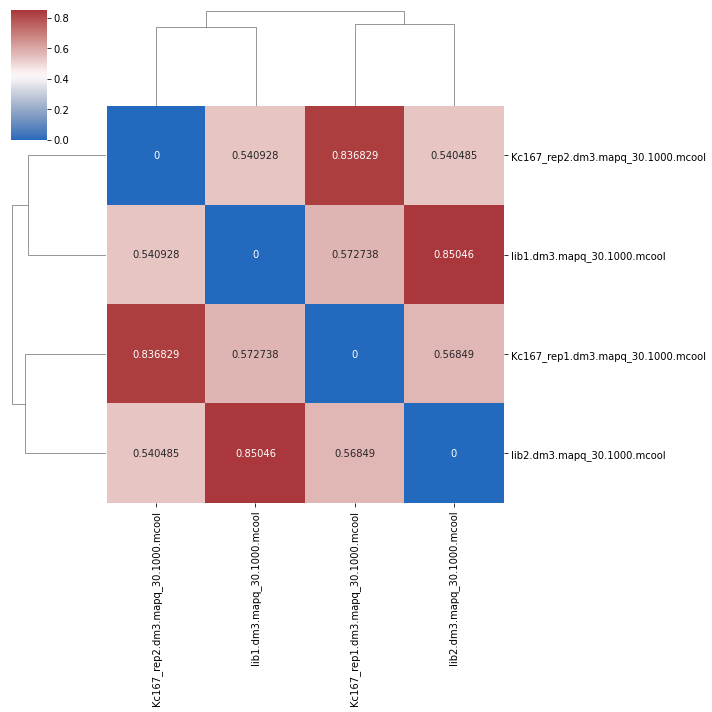

In [8]:
sns.clustermap(pd.DataFrame(scc_heatmap, index=files, columns=files), cmap=sns.color_palette("vlag", as_cmap=True), fmt='g', annot=True)

внутри образцов корреляция выше

### 2

In [42]:
!hicFindTads --matrix lib_1_and_2.dm3.mapq_30.1000.mcool::/resolutions/10000 --outPrefix TADs --correctForMultipleTesting fdr --chromosomes chr2L chr2R chr3L chr3R chrX 

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:hicexplorer.hicFindTADs:removing diagonal values

INFO:hicmatrix.HiCMatrix:Number of poor regions to remove: 290 {'chr2L': 64, 'chr2R': 60, 'chr3L': 67, 'chr3R': 32, 'chrX': 67}
INFO:hicmatrix.HiCMatrix:found existing 290 nan bins that will be included for masking 
INFO:hicexplorer.hicFindTADs:Computing z-score matrix...

INFO:hicmatrix.HiCMatrix:processing chromosome chr2L

INFO:hicmatrix.HiCMatrix:processing chromosome chr2R

INFO:hicmatrix.HiCMatrix:processing chromosome chr3L

INFO:hicmatrix.HiCMatrix:processing chromosome chr3R

INFO:hicmatrix.HiCMatrix:processing chromosome chrX

INFO:hicexplorer.hicFindTADs:Computing TAD-separation scores...

INFO:hicexplorer.hicFindTADs:computing spectrum for window sizes between 10 (100000 bp)and 40 (400000 bp) at the following window sizes 2 [100000, 120000, 156568, 203923

In [43]:
domains_data = pd.read_csv('TADs_domains.bed', sep='\t', header=None)

In [46]:
(domains_data[2] - domains_data[1]).mean()

224575.2895752896

In [48]:
!hicFindTads --matrix lib_1_and_2.dm3.mapq_30.1000.mcool::/resolutions/5000 --minDepth 15000 --maxDepth 40000 --step 5000 --outPrefix TADs_2 --correctForMultipleTesting fdr --chromosomes chr2L chr2R chr3L chr3R chrX 

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:hicexplorer.hicFindTADs:removing diagonal values

INFO:hicmatrix.HiCMatrix:Number of poor regions to remove: 957 {'chr2L': 206, 'chr2R': 198, 'chr3L': 216, 'chr3R': 122, 'chrX': 215}
INFO:hicmatrix.HiCMatrix:found existing 957 nan bins that will be included for masking 
INFO:hicexplorer.hicFindTADs:Computing z-score matrix...

INFO:hicmatrix.HiCMatrix:processing chromosome chr2L

INFO:hicmatrix.HiCMatrix:processing chromosome chr2R

INFO:hicmatrix.HiCMatrix:processing chromosome chr3L

INFO:hicmatrix.HiCMatrix:processing chromosome chr3R

INFO:hicmatrix.HiCMatrix:processing chromosome chrX

INFO:hicexplorer.hicFindTADs:Computing TAD-separation scores...

INFO:hicexplorer.hicFindTADs:computing spectrum for window sizes between 3 (15000 bp)and 8 (40000 bp) at the following window sizes 1 [15000, 20000, 29142]

INFO:hi

In [49]:
domains_data = pd.read_csv('TADs_2_domains.bed', sep='\t', header=None)

In [50]:
(domains_data[2] - domains_data[1]).mean()

99831.62830349531

Размер TAD уменьшился

Нашёл [статью](https://www.nature.com/articles/s41467-019-13350-8#Sec35) где работают с похожими данными (если не теми же самыми), там использовались бины 3.5Kb, в сапплементе нашёл табличку с доменами

In [53]:
domains_data = pd.read_excel(
    '41467_2019_13350_MOESM5_ESM.xlsx', sheet_name='Table S2 domain boundary change', skiprows=[0, 1]
)

In [56]:
(domains_data['end'] - domains_data['start']).mean()

3499.0

Размер домена меньше на порядок, возможно это связано с разницей в других параметрах запуска

### 3

In [57]:
with open('tracks.ini') as input_d:
    print(input_d.read())

[x-axis]
where = top

[hic matrix]
file = lib_1_and_2.dm3.mapq_30.1000.mcool::/resolutions/10000
title = Hi-C data
# depth is the maximum distance plotted in bp. In Hi-C tracks
# the height of the track is calculated based on the depth such
# that the matrix does not look deformed
depth = 300000
transform = log1p
file_type = hic_matrix

[tads]
file = TADs_domains.bed
file_type = domains
border_color = black
color = none
# the tads are overlay over the hic-matrix
# the share-y options sets the y-axis to be shared
# between the Hi-C matrix and the TADs.
overlay_previous = share-y



In [59]:
!hicPlotTADs --tracks tracks.ini --region chrX:1300000-2300000 -o chrX_tads.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [hic matrix]
INFO:pygenometracks.tracksClass:initialize 3. [tads]
100%|██████████████████████████████████████| 518/518 [00:00<00:00, 23449.57it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.08447813987731934
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 7.24302870966257. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [hic matrix]
INFO:pygenometracks.tracks.GenomeTrack:setting min, max values for track 2. [hic matrix] to: 1.0, 1.1000616981707587

INFO:pygenometracks.tracksClass:plotting 3. [tads]


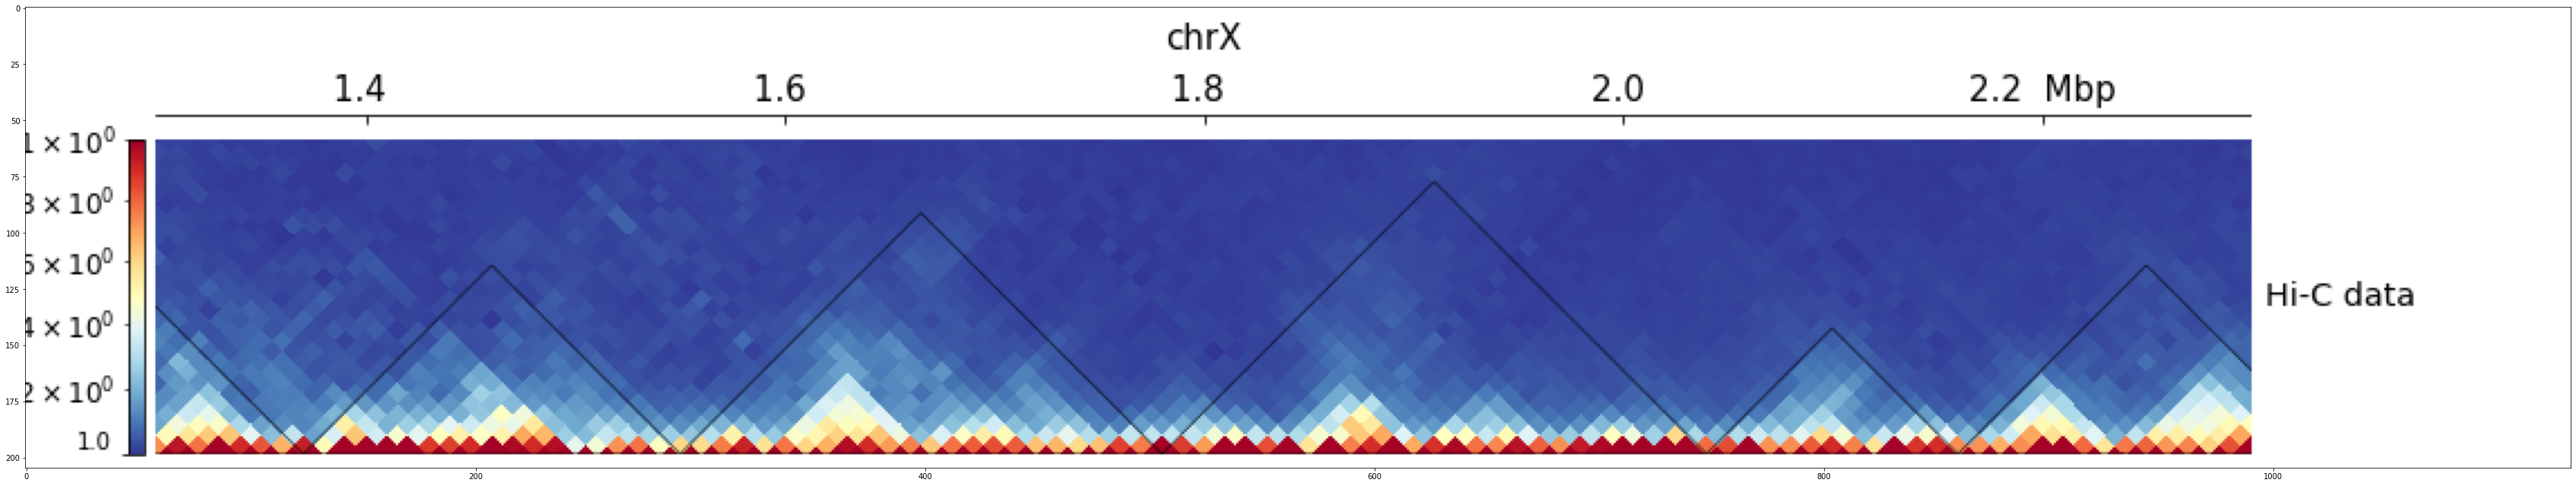

In [64]:
plt.figure(figsize=(60, 20))
plt.imshow(mpimg.imread('chrX_tads.png'))

In [65]:
!hicPlotTADs --tracks tracks.ini --region chrX:2300000-3300000 -o chrX_tads_2.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [hic matrix]

INFO:pygenometracks.tracksClass:initialize 3. [tads]
100%|██████████████████████████████████████| 518/518 [00:00<00:00, 24695.93it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.07339906692504883
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 7.24302870966257. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [hic matrix]
INFO:pygenometracks.tracks.GenomeTrack:setting min, max values for track 2. [hic matrix] to: 1.0, 1.088805962263062

INFO:pygenometracks.tracksClass:plotting 3. [tads]


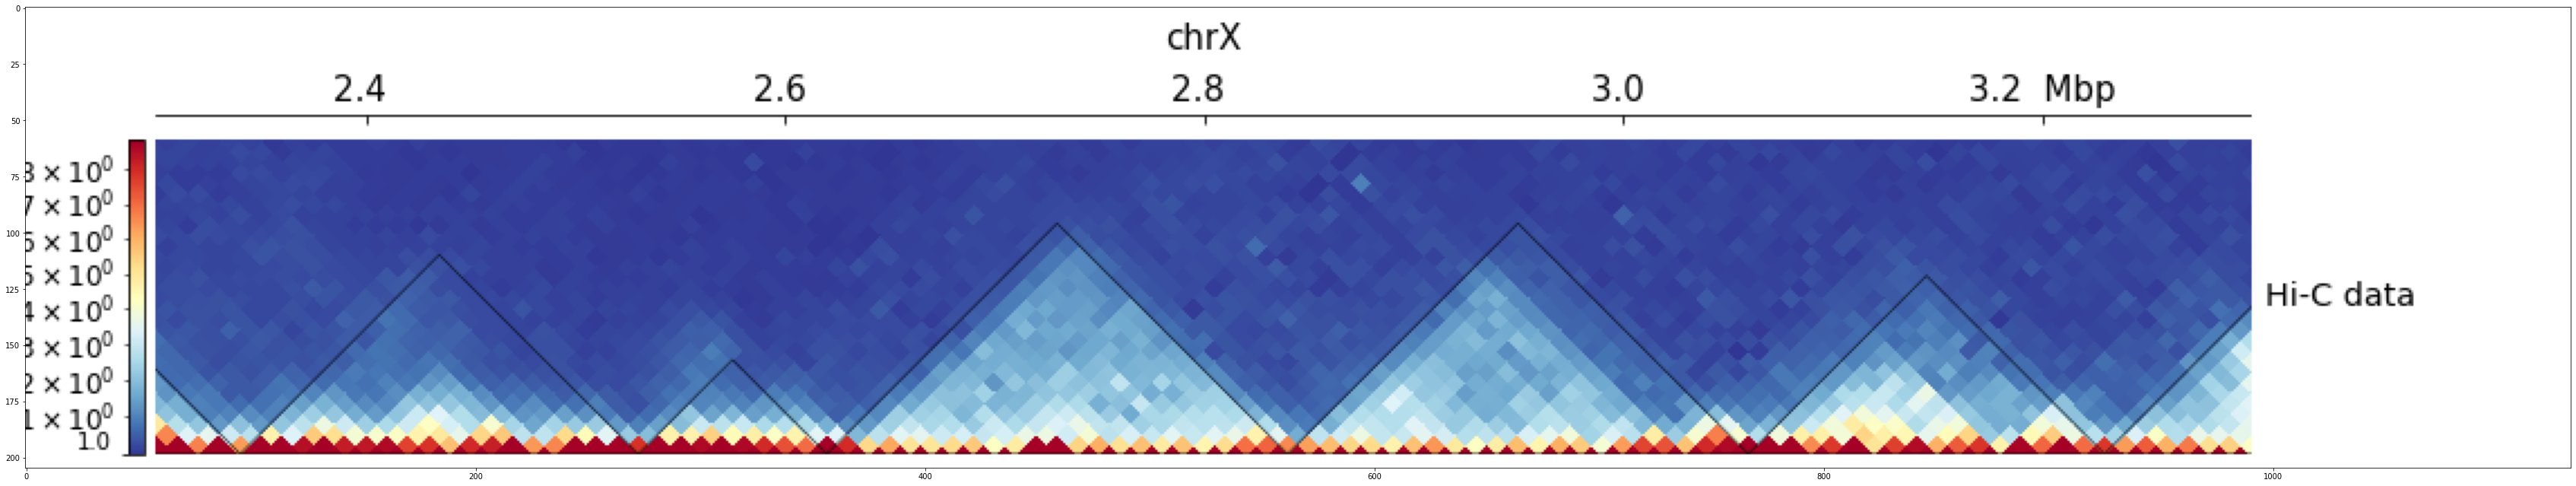

In [66]:
plt.figure(figsize=(60, 20))
plt.imshow(mpimg.imread('chrX_tads_2.png'))

На первом участке TAD явно определились с проблемами, "на глаз" их сложно выделить  
На втором всё лучше, хотя видно погрешность в определении границ

### 4

In [81]:
genome = next(SeqIO.parse('GCF_000001215.4_Release_6_plus_ISO1_MT_genomic.gbff', 'gb'))
boundaries = pd.read_csv('TADs_boundaries.bed', sep='\t', header=None)

In [83]:
genes = [item for item in genome.features if item.type == 'gene']

In [106]:
len(genes)

2689

In [97]:
boundary_genes = list()
for gene in genes:
    if boundaries.apply(
        lambda row: gene.location.start > row[1] - 10000 and gene.location.end < row[2] + 10000, axis=1
    ).any():
        boundary_genes.append(gene)

In [99]:
len(boundary_genes)

1206

In [100]:
domains_data = pd.read_csv('TADs_domains.bed', sep='\t', header=None)

In [104]:
tad_genes = list()
for gene in (item for item in genes if item not in boundary_genes):
    if domains_data.apply(
        lambda row: gene.location.start > row[1] - 10000 and gene.location.end < row[2] + 10000, axis=1
    ).any():
        tad_genes.append(gene)

In [105]:
len(tad_genes)

1478

In [110]:
border_size = ((boundaries[2] + 10000) - (boundaries[1] - 10000)).sum()

In [113]:
tad_no_border_size = (domains_data[2] - domains_data[1]).sum() - border_size

Можно интерпретировать как "число генов на килобазу"

In [117]:
len(boundary_genes) / (border_size / 1000)

0.07604035308953341

In [118]:
len(tad_genes) / (tad_no_border_size / 1000)

0.01471085896287449

In [122]:
expressions = pd.read_csv('BG3_genes.txt', sep='\t', index_col=0)

In [126]:
top_genes = expressions.sort_values('BG3_FPKM', ascending=False)[:400].index.tolist()

У ensembl metazoa дремучее api, с которым можно работать только из перла, поэтому достал инфу с помощью парсинга html (костыльно)

In [168]:
request_template = 'http://metazoa.ensembl.org/Multi/Search/Results?species=all;idx=;q={id};site=ensemblunit&filter_species=drosophila_melanogaster'
location_data = dict()
bad_ids = list()
for gene in tqdm(top_genes):
    sleep(0.3)
    r = requests.get(request_template.format(id=gene))
    r.raise_for_status()
    try:
        location_data[gene] = re.search(r'(?<=/Drosophila_melanogaster/Location/View\?r=)[^;]+', r.text).group()
    except AttributeError:
        bad_ids.append(gene)

In [170]:
bad_ids

['FBgn0015610',
 'FBgn0085364',
 'FBgn0025117',
 'FBgn0004873',
 'FBgn0262707',
 'FBgn0010704',
 'FBgn0038293',
 'FBgn0085817',
 'FBgn0053936',
 'FBgn0035347',
 'FBgn0030079',
 'FBgn0259144',
 'FBgn0035378',
 'FBgn0029128',
 'FBgn0005410',
 'FBgn0020240',
 'FBgn0029173',
 'FBgn0052541',
 'FBgn0036578',
 'FBgn0020756',
 'FBgn0037808',
 'FBgn0034926',
 'FBgn0010381',
 'FBgn0086689',
 'FBgn0015806',
 'FBgn0034434',
 'FBgn0035895']

Поискал руками, в ensembl metazoa "плохие" id либо вообще не находятся, либо связаны с другими мухами (странно)

In [176]:
locations = np.array(
    [list(map(int, re.findall('\d{2,}(?=-)|\d{2,}(?=$)', location))) for location in location_data.values()]
)

In [182]:
boundary_genes = list()
for location in locations:
    if boundaries.apply(
        lambda row: location[0] > row[1] - 10000 and location[1] < row[2] + 10000, axis=1
    ).any():
        boundary_genes.append(list(location))

In [183]:
len(boundary_genes)

160

In [188]:
tad_genes = list()
for location in (item for item in locations if list(item) not in boundary_genes):
    if domains_data.apply(
        lambda row: location[0] > row[1] - 10000 and location[1] < row[2] + 10000, axis=1
    ).any():
        tad_genes.append(gene)

In [189]:
len(tad_genes)

194

In [190]:
len(boundary_genes) / (border_size / 1000)

0.01008827238335435

In [191]:
len(tad_genes) / (tad_no_border_size / 1000)

0.0019309246541256097

In [194]:
print(f"Среди всех генов плотность в границе в {0.07604035308953341 / 0.01471085896287449:.2f} раз больше, среди генов с высокой экспрессией в {0.01008827238335435/0.0019309246541256097:.2f}")

Среди всех генов плотность в границе в 5.17 раз больше, среди генов с высокой экспрессией в 5.22


На границе TAD-ов существенно больше плотность генов, среди высоко экспрессированных этот перевес чуть больше - поскольку можно преположить, что границы TAD-в это открытые области хроматина (в момент фиксации), видимо на границах TAD-ов активно идёт транскрипция (плотность генов больше, потому что TAD "подстраиваются" под гены, которые должны транскрибироваться)

### 5

<ipython-input-5-5392a3af2fc3>:44: FutureWarning: `cooltools.expected.cis_expected()` is deprecated in 0.3.2, will be removed subsequently. Use `cooltools.expected.diagsum()` and `cooltools.expected.diagsum_asymm()` instead.
  expected = cooltools.expected.cis_expected(c, regions, use_dask=True)
/usr/local/lib/python3.8/site-packages/cooltools/saddle.py:147: RuntimeWarning: invalid value encountered in true_divide
  return obs_mat / exp_mat
<ipython-input-5-5392a3af2fc3>:44: FutureWarning: `cooltools.expected.cis_expected()` is deprecated in 0.3.2, will be removed subsequently. Use `cooltools.expected.diagsum()` and `cooltools.expected.diagsum_asymm()` instead.
  expected = cooltools.expected.cis_expected(c, regions, use_dask=True)
/usr/local/lib/python3.8/site-packages/cooltools/saddle.py:147: RuntimeWarning: invalid value encountered in true_divide
  return obs_mat / exp_mat


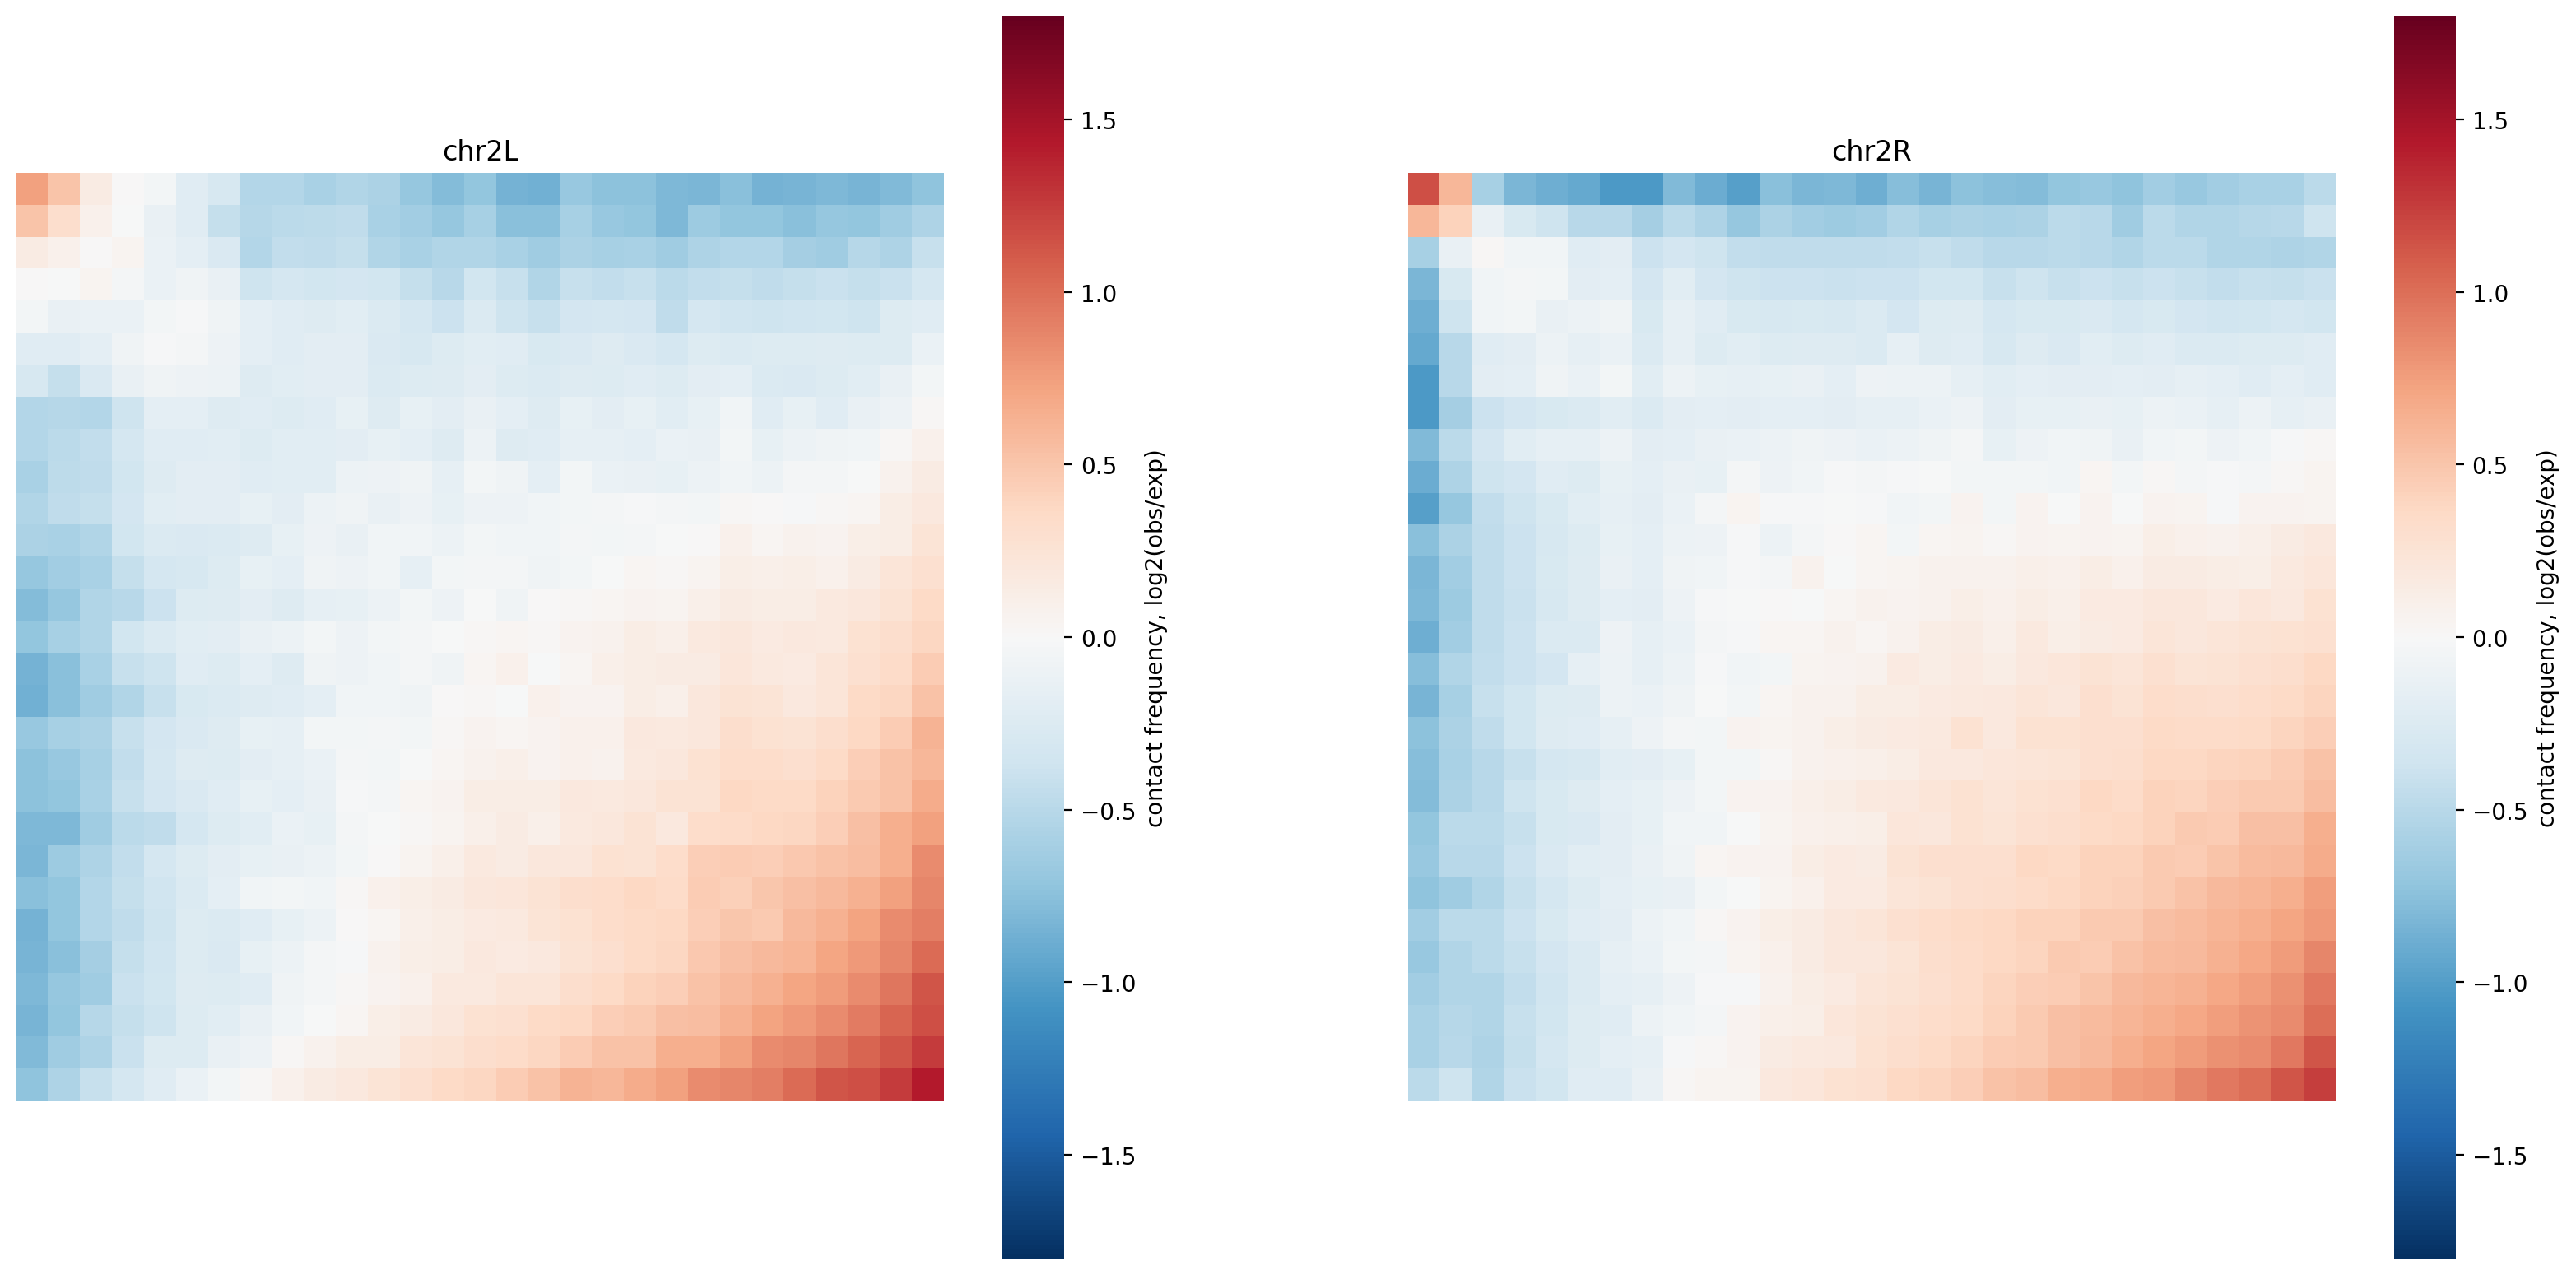

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from bioframe.tools import frac_gene_coverage
import cooler
import pybedtools as bedtools
import cooltools
import cooltools.eigdecomp
import cooltools.expected
import cooltools.saddle
import seaborn as sns

coolpath = 'lib_1_and_2.dm3.mapq_30.1000.mcool::resolutions/10000'


c = cooler.Cooler(coolpath)
_, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10), dpi=200)
for chrom, ax in zip(['chr2L', 'chr2R'], axes):
    regions = [(chrom, 0, c.chromsizes[chrom])]
    bins = c.bins()[:]
    genecov = frac_gene_coverage(bins, 'dm3')
    cis_eigs = cooltools.eigdecomp.cooler_cis_eig(
            c,
            genecov,
            regions=regions,
            n_eigs=10,
            balance='weight',
            phasing_track_col='gene_count')

    N_GROUPS=30

    Q_LO = 0.01 # ignore
    Q_HI = 0.99 # ignore ...% of genomic bins with the highest E1 values

    q_edges = np.linspace(Q_LO, Q_HI, N_GROUPS)

    group_E1_bounds = cooltools.saddle.quantile(cis_eigs[1]['E1'], q_edges)

    digitized, hist = cooltools.saddle.digitize_track(
        group_E1_bounds,
        track=(cis_eigs[1], 'E1')
    )


    expected = cooltools.expected.cis_expected(c, regions, use_dask=True)

    getmatrix = cooltools.saddle.make_cis_obsexp_fetcher(c, (expected, 'balanced.avg'))

    S, C = cooltools.saddle.make_saddle(
            getmatrix,
            group_E1_bounds,
            (digitized, 'E1' + '.d'),
            contact_type='cis',
            regions=[chrom]
    )
    sp = np.log2(S / C)

    hic = sp
    sns.heatmap(
        hic[1:-1, 1:-1],
        cmap="RdBu_r",
        square=True,  
        vmax=1.8,
        vmin=-1.8,
        yticklabels=[],
        xticklabels=[],
        cbar_kws={'label': 'contact frequency, log2(obs/exp)'},
        ax=ax
    )
    ax.set_title(chrom)

* Считают observed-over-expected для Hi-C карты
* Считают матрицу попарных коррелций полученных скоров
* Применяют PCA
* 1-я главная компонента, как правило, отражает статус активный/неактивный компратмент (>0 - активный, иначе неактивный)
* сортируют бины (предварительно объединив в большие бины) по размеру первой главной компоненты, рисуют для этих бинов скоры взаимодействия

Saddle plot отображает, какая доля исследуемого участка генома относится к активным компартментам, а какая к неактивным (можно условно разделить по линии 1-я главная компонента == 0)

![image.png](./1.png)

На этих графиках явно видно, что бОльшую часть обоих хромосом составляют активные компартменты

### 6

Эту часть (в отличие от всех предыдущих) выполнял на кластере

time nextflow distiller.nf -params-file ./project.yml

![image.png](./2.png)

![image.png](./3.png)

![image.png](./4.png)

число контактов чуть больше в фильтрованных данных, фильтрация убирает риды с плохим картированием, очевидно что уменьшение числа ридов приведет к уменьшению числа контактов (668803 против 691814)

project.yaml

In [12]:
with open('project.yml') as input_d:
    print(input_d.read())

#########################################
# THIS IS A TYPICAL project.yml TEMPLATE
# most of the settings present here
# are GO for mapping production data
# but nonetheless user must consider
# carefully every presented option
#########################################

#########################################
# When commmenting parameters out, make sure
# that each section still has at least one
# uncommented parameter, otherwise it
# will not get properly parsed.
#########################################



#######################################
# provide paths to your raw input data (fastq-s):
#######################################
# Fastqs can be provided as:
# -- a pairs of relative/absolute paths
# -- sra:<SRA_NUMBER>, optionally followed by the indices of the first and
# the last entry in the SRA in the form of "?start=<first>&end=<last>
input:
    raw_reads_paths:
        bg_library:
            lane1:
                - /home/kononkova/hic_data_hse/SRR8195120_1.fastq.gz
    